# Binary Classification

**Purpose is to know which customer will quit the bank (exited 1) or stay (exited 0)**

STEP 1 : Import the DataSet

In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Churn_Modelling.csv')
dataset




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


STEP 2 : Create the X and Y


In [2]:
X=dataset.iloc[:, 3: 13].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

Random variable Y created with labels (what we need to find)

In [3]:
Y=dataset.iloc[:,13].values
Y

array([1, 0, 1, ..., 1, 1, 0])

STEP 3 : Encoding

String categories must be encoded to numbers. There is several methods :

1. Ordinal Encoding : Give a number for each category

In [4]:
from sklearn.preprocessing import LabelEncoder
X_ord_1 = dataset.iloc[:, 3: 13].values
labelEncoder_X_1 = LabelEncoder () #instanciate an object of the class LabelEncoder
X_ord_1[:,1] = labelEncoder_X_1.fit_transform(X_ord_1[:,1]) #ordinal encoding for column 1
labelEncoder_X_2 = LabelEncoder ()
X_ord_1[:,2] = labelEncoder_X_2.fit_transform(X_ord_1[:,2]) #ordinal encoding for column 2
X_ord_1

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

We have translated categorical values Country and Gender (column 1 and 2 from X) into numerical labels.

2. One Hot Encoding

Another way to encode is to do a ONE-HOT Encoding. Instead of using 1,2,3... we use several columns with 1 and 0 to give a binary code. Here column 0,1,2 show the country in ONE-HOT Encoding where column 4 shows the gender as ordinal encoding.

In [5]:
X=X_ord_1
# ONE-HOT ENCODING :
# Way 1 : using values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

ct = ColumnTransformer( #'encoder' is the name of the column transformer
    [('encoder', OneHotEncoder(),[1])], #column number to be transformed
    remainder='passthrough' #leave the rest of the columns untouched
)
X = np.array(ct.fit_transform(X), dtype=np.float)
df=pd.DataFrame(X)
df          

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771.0,1.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,1.0,0.0,0.0,516.0,1.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,1.0,0.0,0.0,709.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,0.0,1.0,0.0,772.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


Another method :

In [6]:
# Way 2 : using dataframe :
X_df = dataset.iloc[:,3:13]
X_df = pd.concat([X_df, pd.get_dummies(X_df['Geography'], prefix='country', drop_first=True)], axis=1) # drops the first column
# axis=1 means to concatenate along the columns (put one column beside another)
X_df.drop(['Geography'], axis=1, inplace=True) #get rid of the original Geography column
X_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_Germany,country_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0


Here we remove the Country column and add two more at the end : as we have only 3 countries, if it's not Germany, and not Spain, then it's France. So France column is not necessary to know that the customer comes from France.

This helps to prevent the "Dummy Data Trap" where columns are 100 % correlated and so one value predicts always properly the others. If it's less then it may be kept (depending of the precision we need).

STEP 4 : Splitting the data

Split the data into training and test set (20% for the test set)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 10) # We use random_state to make sure splitting contains the same data each time (for purpose here)

STEP 5 : Standardize the data

Standardization is the fact to rescale the data to have the mean to 0 and the standard deviation to 1. This helps to accentuate the data variations to improve the learning process.

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #note that we use the scale set from the training set to transform the test set
df = pd.DataFrame(X_train)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.005515,1.734363,-0.573886,1.789744,0.912557,0.943942,1.042715,0.909825,-0.918722,0.640072,0.975305,-0.560873
1,-1.005515,-0.576580,1.742506,0.260405,-1.095822,2.359325,-0.350532,0.649509,-0.918722,0.640072,0.975305,-0.156221
2,-1.005515,-0.576580,1.742506,-0.225264,0.912557,-0.471440,0.346091,-1.220910,0.799318,0.640072,-1.025320,1.569218
3,-1.005515,-0.576580,1.742506,0.394739,-1.095822,-0.754517,-0.698844,1.014868,-0.918722,-1.562325,0.975305,0.357143
4,0.994515,-0.576580,-0.573886,1.407409,0.912557,1.132660,-1.743780,-0.291139,-0.918722,-1.562325,0.975305,0.737628
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.994515,-0.576580,-0.573886,0.270738,0.912557,-0.848876,-1.395468,0.028652,-0.918722,-1.562325,0.975305,1.288797
7996,-1.005515,-0.576580,1.742506,-0.535265,0.912557,-0.565799,-0.350532,-0.394232,-0.918722,0.640072,-1.025320,0.199888
7997,-1.005515,1.734363,-0.573886,-1.971603,-1.095822,0.094713,0.346091,0.690343,0.799318,0.640072,-1.025320,-0.149070
7998,0.994515,-0.576580,-0.573886,0.601406,-1.095822,-0.471440,-1.047156,0.564993,-0.918722,0.640072,-1.025320,-0.749696


STEP 6 : Neural Network Setup

Here we'll create two layers for our Neuronal Network.

In [9]:
#We use 2 dense layers
import tensorflow as tf
model = tf.keras.models.Sequential()

#add input layer and first hidden layer
model.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))

#add second hidden layer
model.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))

The number of units is choosen by experience. It's usually an average between the input node (here 11) and the output node (here 1).


In [10]:
#Add the output layer
model.add(tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

Sigmoid for binary (quit or not quit the bank), would be Softmax in case of more categories.

In [11]:
#Compilation
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

#Training
history=model.fit(X_train, Y_train, batch_size=10, epochs=100, verbose=2,)

Epoch 1/100
800/800 - 2s - loss: 0.4902 - accuracy: 0.7977
Epoch 2/100
800/800 - 1s - loss: 0.4254 - accuracy: 0.7981
Epoch 3/100
800/800 - 1s - loss: 0.4202 - accuracy: 0.7981
Epoch 4/100
800/800 - 1s - loss: 0.4159 - accuracy: 0.8156
Epoch 5/100
800/800 - 1s - loss: 0.4130 - accuracy: 0.8271
Epoch 6/100
800/800 - 1s - loss: 0.4110 - accuracy: 0.8320
Epoch 7/100
800/800 - 1s - loss: 0.4089 - accuracy: 0.8329
Epoch 8/100
800/800 - 1s - loss: 0.4074 - accuracy: 0.8342
Epoch 9/100
800/800 - 1s - loss: 0.4058 - accuracy: 0.8332
Epoch 10/100
800/800 - 1s - loss: 0.4053 - accuracy: 0.8356
Epoch 11/100
800/800 - 1s - loss: 0.4039 - accuracy: 0.8365
Epoch 12/100
800/800 - 1s - loss: 0.4034 - accuracy: 0.8371
Epoch 13/100
800/800 - 1s - loss: 0.4028 - accuracy: 0.8391
Epoch 14/100
800/800 - 1s - loss: 0.4018 - accuracy: 0.8375
Epoch 15/100
800/800 - 1s - loss: 0.4012 - accuracy: 0.8390
Epoch 16/100
800/800 - 1s - loss: 0.4006 - accuracy: 0.8380
Epoch 17/100
800/800 - 1s - loss: 0.3999 - accura

STEP 7 : Evaluation

Now our model is trained, we need to evaluate it.
First let's see the characteristics of our model.

In [12]:
loss,accuracy = model.evaluate(X_test, Y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8325


Then we change the values of the Y predicted to True and False to make it boolean.

In [13]:
Y_pred = model.predict(X_test)
Y_pred = (Y_pred > 0.5)
print(Y_pred)

[[False]
 [False]
 [ True]
 ...
 [False]
 [False]
 [False]]


Now we'll predict using the information of a new customer (we'll create)

In [30]:
new_customer = [[1,0,0,502,0,42,8,0,3,1,0,0]]
new_customer = sc.transform(new_customer)
new_prediction = model.predict(new_customer)
new_prediction = (new_prediction > 0.5)
if print(new_prediction) == "True" :
    print("This customer will leave the Bank")
else :
    print("This customer should stay in the Bank")

[[False]]
This customer should stay in the Bank


STEP 8 : Save the model

In [31]:
model.save('/content/drive/MyDrive/Colab Notebooks/churn_model.h5')

CONCLUSION : Graphical representation of our model

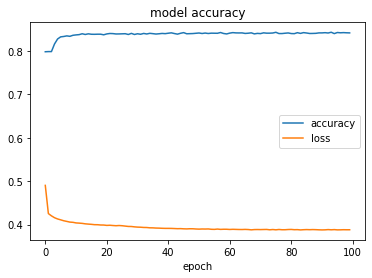

In [32]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','loss'])
plt.show()


REMARK :

It's possible to split the data directly into the model generation

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

history = model.fit(X,Y, verbose = 1,
                    validation_split=0.2,
                    epochs = 100,
                    batch_size = 10)

Epoch 1/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3920 - accuracy: 0.8396 - val_loss: 0.4005 - val_accuracy: 0.8400
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3916 - accuracy: 0.8397 - val_loss: 0.4014 - val_accuracy: 0.8390
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3912 - accuracy: 0.8393 - val_loss: 0.4018 - val_accuracy: 0.8375
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3912 - accuracy: 0.8381 - val_loss: 0.4028 - val_accuracy: 0.8365
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3911 - accuracy: 0.8397 - val_loss: 0.4026 - val_accuracy: 0.8365
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3908 - accuracy: 0.8378 - val_loss: 0.4036 - val_accuracy: 0.8375
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3912 - accuracy: 0.8395 - val_loss: 0.4023 - val_accuracy: 0.8360

In [ ]:
plt.plot(history.history ['accuracy'])
plt.plot(history.history ['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['accuracy','validation_accuracy','loss','validation_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()